# Домашнее задание № 2. Мешок слов

## Задание 1 (3 балла)

У векторайзеров в sklearn есть встроенная токенизация на регулярных выражениях. Найдите способо заменить её на кастомную токенизацию

Обучите векторайзер с дефолтной токенизацией и с токенизацией razdel.tokenize. Обучите классификатор (любой) с каждым из векторизаторов. Сравните метрики и выберете победителя. 

(в вашей тетрадке должен быть код обучения и все метрики; если вы сдаете в .py файлах то сохраните полученные метрики в отдельном файле или в комментариях)

In [430]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import razdel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [431]:
data = pd.read_csv('labeled.csv')

In [432]:
data['comment'][:20]

0                  Верблюдов-то за что? Дебилы, бл...\n
1     Хохлы, это отдушина затюканого россиянина, мол...
2                             Собаке - собачья смерть\n
3     Страницу обнови, дебил. Это тоже не оскорблени...
4     тебя не убедил 6-страничный пдф в том, что Скр...
5     Для каких стан является эталоном современная с...
6     В шапке были ссылки на инфу по текущему фильму...
7     УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...
8                         Ебать тебя разносит, шизик.\n
9                             Обосрался, сиди обтекай\n
10    Зачем ты пишешь хуйню, дегенерат? Поцелуй в гу...
11    Бактерия, тебе этого не понять Конечно, я же н...
12    Почитайте посты у этого автора,может найдете ч...
13     Уроды!! у нас в семье 3 поколения там родились\n
14    Можем на тебя ещё и модера за безмозглых позва...
15    хорош врать, ты террорист-торчёк-шизофреник пр...
16    Всем, кстати, наплевать. Главное - уровень жиз...
17    Про графику было обидно) я так то проходил

In [433]:
train, test = train_test_split(data, test_size=0.1, shuffle=True)

In [434]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [435]:
def rzd_tokenize(sent):
    tkns = list(razdel.tokenize(sent))
    tokens = [t.text for t in tkns]
    return tokens

In [436]:
vectorizer_rzd = CountVectorizer(analyzer='word', tokenizer=rzd_tokenize)
#vectorizer_rzd = CountVectorizer(analyzer='word', tokenizer=lambda text: [token.text for token in tokenize(text)])
X_rzd = vectorizer_rzd.fit_transform(train.comment)
X_rzd_test = vectorizer_rzd.transform(test.comment) 

In [57]:
X_rzd.shape

(12970, 64974)

In [437]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train.comment)
X_test = vectorizer.transform(test.comment) 

In [438]:
print(X.shape, X_rzd.shape, y.shape, y_test.shape)

(12970, 64015) (12970, 64912) (12970,) (1442,)


In [439]:
y = train.toxic.values
y_test = test.toxic.values

In [440]:
clf = LogisticRegression(C=0.1, class_weight='balanced')
clf.fit(X, y)
clf.classes_

array([0., 1.])

In [441]:
preds = clf.predict(X_test)

In [442]:
#результаты для классификатора обученного на векторайзере с дефолтной токенизацией
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       953
         1.0       0.70      0.85      0.77       489

    accuracy                           0.83      1442
   macro avg       0.81      0.83      0.81      1442
weighted avg       0.84      0.83      0.83      1442



In [443]:
clf2 = LogisticRegression(C=0.1, class_weight='balanced')
clf2.fit(X_rzd, y)
preds2 = clf2.predict(X_rzd_test)

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [444]:
#результаты для классификатора обученного на векторайзере с токенизацией из раздела
print(classification_report(y_test, preds2, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       953
         1.0       0.70      0.82      0.76       489

    accuracy                           0.82      1442
   macro avg       0.80      0.82      0.81      1442
weighted avg       0.83      0.82      0.83      1442



In [ ]:
#как будто разница получилась настолько незначительная, что сложно выбрать победителя(

## Задание 2 (3 балла)

Обучите 2 любых разных классификатора из семинара. Предскажите токсичность для текстов из тестовой выборки (используйте одну и ту же выборку для обоих классификаторов) и найдите 10 самых токсичных для каждого из классификаторов. Сравните получаемые тексты - какие тексты совпадают, какие отличаются, правда ли тексты токсичные?

Требования к моделям:   
а) один классификатор должен использовать CountVectorizer, другой TfidfVectorizer  
б) у векторазера должны быть вручную заданы как минимум 5 параметров (можно ставить разные параметры tfidfvectorizer и countvectorizer)  
в) у классификатора должно быть задано вручную как минимум 2 параметра (по возможности)  
г)  f1 мера каждого из классификаторов должна быть минимум 0.75  

*random_seed не считается за параметр

In [383]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

In [445]:
#модель с CountVectorizer и логистической регрессией
vectorizer_c = CountVectorizer(ngram_range=(1, 4), min_df=5, max_df=0.4, stop_words=russian_stopwords, lowercase=True)
X_c = vectorizer_c.fit_transform(train.comment)
X_c_test = vectorizer_c.transform(test.comment) 
#если честно удаление стопслов как будто только ухудшило качество модели...

In [446]:
y = train.toxic.values
y_test = test.toxic.values

In [108]:
#попытка подобрать параметры
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    # 'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X_c, y)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.665 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solve

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ...C=0.001, penalty=l2, solver=sag;, score=0.665 total time=   0.2s
[CV 3/5] END ...C=0.001, penalty=l2, solver=sag;, score=0.664 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ...C=0.001, penalty=l2, solver=sag;, score=0.664 total time=   0.2s
[CV 5/5] END ...C=0.001, penalty=l2, solver=sag;, score=0.664 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.665 total time=   0.2s
[CV 2/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.665 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.664 total time=   0.2s
[CV 4/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.664 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.664 total time=   0.2s
[CV 1/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.665 total time=   0.0s
[CV 2/5] END C=0.01, penal

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.665 total time=   0.2s
[CV 2/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.665 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.664 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.664 total time=   0.2s
[CV 5/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.664 total time=   0.2s
[CV 1/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.687 total time=   0.1s
[CV 2/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.693 total time=   0.1s
[CV 3/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.682 total time=   0.1s
[CV 4/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.689 total time=   0.1s
[CV 5/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.688 total time=   0.1s
[CV 1/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.687 total time=   0.0s
[CV 2/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.682 total time=   0.0s
[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.689 total time=   0.2s
[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.688 total time=   0.0s
[CV 1/5] END C=0.0

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.692 total time=   0.2s
[CV 2/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.700 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.691 total time=   0.2s
[CV 4/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.693 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.692 total time=   0.2s
[CV 1/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.702 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.707 total time=   0.2s
[CV 3/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.702 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.702 total time=   0.2s
[CV 5/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.701 total time=   0.1s
[CV 1/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, penalty=

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.722 total time=   1.5s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.724 total time=   1.5s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.720 total time=   1.5s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.721 total time=   1.5s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.727 total time=   1.2s
[CV 1/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 2/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 3/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.787 total time=   0.1s
[CV 4/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.1s
[CV 5/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.1s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.789 total time=   0.1s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.787 total time=   0.1s
[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.1s
[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.1s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.800 total time=   0.1s
[CV 2/5] END C=0.1, pe

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.796 total time=   0.2s
[CV 2/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.786 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.783 total time=   0.2s
[CV 4/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.791 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.799 total time=   0.2s
[CV 1/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.785 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.778 total time=   0.2s
[CV 3/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.774 total time=   0.1s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.777 total time=   0.2s
[CV 5/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.795 total time=   0.2s
[CV 1/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .C=1, penalty=l

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ......C=1, penalty=l1, solver=saga;, score=0.785 total time=  28.9s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ......C=1, penalty=l1, solver=saga;, score=0.779 total time=  28.7s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ......C=1, penalty=l1, solver=saga;, score=0.774 total time=  28.4s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ......C=1, penalty=l1, solver=saga;, score=0.777 total time=  28.6s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ......C=1, penalty=l1, solver=saga;, score=0.793 total time=  25.4s
[CV 1/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.831 total time=   0.2s
[CV 2/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.822 total time=   0.2s
[CV 3/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.832 total time=   0.2s
[CV 4/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.830 total time=   0.2s
[CV 5/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.832 total time=   0.2s
[CV 1/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.831 total time=   0.1s
[CV 2/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.822 total time=   0.1s
[CV 3/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.832 total time=   0.2s
[CV 4/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.830 total time=   0.2s
[CV 5/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.832 total time=   0.2s
[CV 1/5] END .C=1, penalty=l2, solver=liblinear;, score=0.831 total time=   0.2s
[CV 2/5] END .C=1, penalty=l

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .......C=1, penalty=l2, solver=sag;, score=0.804 total time=   0.2s
[CV 3/5] END .......C=1, penalty=l2, solver=sag;, score=0.810 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .......C=1, penalty=l2, solver=sag;, score=0.807 total time=   0.2s
[CV 5/5] END .......C=1, penalty=l2, solver=sag;, score=0.821 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ......C=1, penalty=l2, solver=saga;, score=0.799 total time=   0.2s
[CV 2/5] END ......C=1, penalty=l2, solver=saga;, score=0.788 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ......C=1, penalty=l2, solver=saga;, score=0.785 total time=   0.2s
[CV 4/5] END ......C=1, penalty=l2, solver=saga;, score=0.789 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ......C=1, penalty=l2, solver=saga;, score=0.808 total time=   0.2s
[CV 1/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.801 total time=   0.1s
[CV 2/5] END C=10, penalty=l

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.800 total time=  52.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.788 total time=  52.0s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.786 total time=  52.1s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.787 total time=  52.1s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.809 total time=  51.6s
[CV 1/5] END C=10, penalty=l2, solver=newton-cg;, score=0.815 total time=   0.3s
[CV 2/5] END C=10, penalty=l2, solver=newton-cg;, score=0.820 total time=   0.3s
[CV 3/5] END C=10, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.4s
[CV 4/5] END C=10, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.3s
[CV 5/5] END C=10, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.3s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

[CV 1/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.815 total time=   0.3s
[CV 2/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.822 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

[CV 3/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.2s
[CV 4/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.818 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.2s
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.815 total time=   0.6s
[CV 2/5] END C=10, penalty=l2, solver=liblinear;, score=0.820 total time=   0.5s
[CV 3/5] END C=10, penalty=l2, solver=liblinear;, score=0.817 total time=   0.9s
[CV 4/5] END C=10, penalty=l2, solver=liblinear;, score=0.817 total time=   0.5s
[CV 5/5] END C=10, penalty=l2, solver=liblinear;, score=0.815 total time=   0.4s
[CV 1/5] END ......C=10, penalty=l2, solver=sag;, score=0.815 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ......C=10, penalty=l2, solver=sag;, score=0.805 total time=   0.2s
[CV 3/5] END ......C=10, penalty=l2, solver=sag;, score=0.811 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ......C=10, penalty=l2, solver=sag;, score=0.811 total time=   0.2s
[CV 5/5] END ......C=10, penalty=l2, solver=sag;, score=0.824 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .....C=10, penalty=l2, solver=saga;, score=0.801 total time=   0.2s
[CV 2/5] END .....C=10, penalty=l2, solver=saga;, score=0.790 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .....C=10, penalty=l2, solver=saga;, score=0.787 total time=   0.2s
[CV 4/5] END .....C=10, penalty=l2, solver=saga;, score=0.789 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.810 total time=   0.2s
[CV 1/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.777 total time=   0.1s
[CV 2/5] END C=100, penalty

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=100, penalty=l1, solver=saga;, score=0.801 total time=  55.7s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=100, penalty=l1, solver=saga;, score=0.789 total time=  55.0s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.788 total time=  55.1s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.789 total time=  54.8s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.810 total time=  54.8s
[CV 1/5] END C=100, penalty=l2, solver=newton-cg;, score=0.790 total time=   0.7s
[CV 2/5] END C=100, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.8s
[CV 3/5] END C=100, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.6s
[CV 4/5] END C=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.7s
[CV 5/5] END C=100, penalty=l2, solver=newton-cg;, score=0.789 total time=   0.7s
[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.801 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.2s
[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.809 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.2s
[CV 5/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.801 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.813 total time=   0.8s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.809 total time=   1.0s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.812 total time=   0.8s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.810 total time=   0.8s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.813 total time=   0.8s
[CV 1/5] END .....C=100, penalty=l2, solver=sag;, score=0.815 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .....C=100, penalty=l2, solver=sag;, score=0.805 total time=   0.2s
[CV 3/5] END .....C=100, penalty=l2, solver=sag;, score=0.812 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .....C=100, penalty=l2, solver=sag;, score=0.811 total time=   0.2s
[CV 5/5] END .....C=100, penalty=l2, solver=sag;, score=0.824 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=100, penalty=l2, solver=saga;, score=0.801 total time=   0.2s
[CV 2/5] END ....C=100, penalty=l2, solver=saga;, score=0.790 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=100, penalty=l2, solver=saga;, score=0.788 total time=   0.2s
[CV 4/5] END ....C=100, penalty=l2, solver=saga;, score=0.789 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=100, penalty=l2, solver=saga;, score=0.810 total time=   0.2s
[CV 1/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, penalty=l1, solver=liblinear;, score=0.769 total time=   0.7s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END C=1000, penalty=l1, solver=liblinear;, score=0.777 total time=  25.9s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END C=1000, penalty=l1, solver=liblinear;, score=0.781 total time=  29.6s
[CV 4/5] END C=1000, penalty=l1, solver=liblinear;, score=0.778 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END C=1000, penalty=l1, solver=liblinear;, score=0.765 total time=  27.0s
[CV 1/5] END ......C=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ......C=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ......C=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ......C=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ......C=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ...C=1000, penalty=l1, solver=saga;, score=0.801 total time=  55.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ...C=1000, penalty=l1, solver=saga;, score=0.790 total time=  55.0s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ...C=1000, penalty=l1, solver=saga;, score=0.788 total time=  55.0s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ...C=1000, penalty=l1, solver=saga;, score=0.789 total time=  55.1s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ...C=1000, penalty=l1, solver=saga;, score=0.810 total time=  55.0s
[CV 1/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.783 total time=   1.0s
[CV 2/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.785 total time=   0.9s
[CV 3/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.786 total time=   0.9s
[CV 4/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.798 total time=   1.3s
[CV 5/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.778 total time=   1.1s
[CV 1/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.801 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

[CV 2/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.2s
[CV 3/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.807 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

[CV 4/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.2s
[CV 5/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.807 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END C=1000, penalty=l2, solver=liblinear;, score=0.813 total time=   0.8s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END C=1000, penalty=l2, solver=liblinear;, score=0.815 total time=   0.8s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END C=1000, penalty=l2, solver=liblinear;, score=0.813 total time=   0.8s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END C=1000, penalty=l2, solver=liblinear;, score=0.809 total time=   0.9s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1000, penalty=l2, solver=liblinear;, score=0.813 total time=   0.8s
[CV 1/5] END ....C=1000, penalty=l2, solver=sag;, score=0.815 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=1000, penalty=l2, solver=sag;, score=0.805 total time=   0.2s
[CV 3/5] END ....C=1000, penalty=l2, solver=sag;, score=0.811 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=1000, penalty=l2, solver=sag;, score=0.810 total time=   0.2s
[CV 5/5] END ....C=1000, penalty=l2, solver=sag;, score=0.824 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ...C=1000, penalty=l2, solver=saga;, score=0.801 total time=   0.2s
[CV 2/5] END ...C=1000, penalty=l2, solver=saga;, score=0.791 total time=   0.2s


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ...C=1000, penalty=l2, solver=saga;, score=0.789 total time=   0.2s
[CV 4/5] END ...C=1000, penalty=l2, solver=saga;, score=0.790 total time=   0.2s
[CV 5/5] END ...C=1000, penalty=l2, solver=saga;, score=0.811 total time=   0.2s
Mean Accuracy: 0.829
Config: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ignatenkodarja/Library/Python/3.7/lib/pyt

In [447]:
#Config: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
clf_logit = LogisticRegression(C=1, penalty='l2', max_iter=1000, solver='lbfgs', class_weight='balanced')
clf_logit.fit(X_c, y)
preds = clf_logit.predict(X_c_test)

In [448]:
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85       953
         1.0       0.69      0.82      0.75       489

    accuracy                           0.81      1442
   macro avg       0.79      0.81      0.80      1442
weighted avg       0.82      0.81      0.81      1442



In [449]:
#топ 10 для первой модели
proba_logit = clf_logit.predict_proba(X_c_test)
df_logit = pd.DataFrame(proba_logit, columns=['proba_logit_0', 'proba_logit_1'])
df_logit['comment'], df_logit['toxic'] = test.comment, test.toxic.values
final_logit = df_logit.sort_values(by=['proba_logit_1'], inplace=False, ascending=False)[:50]

final_logit

,proba_logit_0,proba_logit_1,comment,toxic
1021,2.104486e-07,1.000000,"Но Трамп и в правда дегенерат. Жаль, что этот ...",1.0
1015,1.169411e-06,0.999999,Ебать даун. Ментам звони и вcе. Такие выходки ...,1.0
1276,1.215009e-06,0.999999,Что? Какой денежный петух? Нет у хохлов своих ...,1.0
513,1.470089e-05,0.999985,"БЕЛАРУСЬ, БЛЯТЬ, БЕЛАРУСЬ. СПИДОРСВИН, БЛЯТЬ. ...",1.0
207,2.393994e-05,0.999976,приходит умный человек и помогает ему научитьс...,0.0
1206,2.415020e-05,0.999976,"Как известно, у Укр ины (т.е. окр ины), слепле...",1.0
1019,2.415020e-05,0.999976,"Как известно, у Укр ины (т.е. окр ины), слепле...",1.0
1231,5.389494e-05,0.999946,"Двач. Ну это пиздец, конечно. Раньше я его ува...",1.0
1068,1.245734e-04,0.999875,"ИДИ НАХУЙ, СУКА, ЗАВАЛИ ЕБАЛО, БЛЯТЬ\n",1.0
10,1.369365e-04,0.999863,"Какая убогая банда, гуляет на просторах YouTub...",1.0


In [450]:
#модель с TfidfVectorizer и random forest
vectorizer_tfidf = TfidfVectorizer(max_features=800, min_df=5, max_df=0.4, lowercase=True, stop_words=russian_stopwords )
X_tfidf = vectorizer_tfidf.fit_transform(train.comment)
X_tfidf_test = vectorizer_tfidf.transform(test.comment) 
#max_features=800,
#то же самое со стоп-словами: с одной стороны, их охота убрать, но почему-то это плохо влияет на f1 score

In [451]:
rf = RandomForestClassifier(n_estimators=100, max_depth=1000)
rf.fit(X_tfidf, y)
preds_rf = rf.predict(X_tfidf_test)

In [452]:
print(classification_report(y_test, preds_rf, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82       953
         1.0       0.64      0.63      0.64       489

    accuracy                           0.76      1442
   macro avg       0.73      0.73      0.73      1442
weighted avg       0.76      0.76      0.76      1442



In [453]:
proba_rf = rf.predict_proba(X_tfidf_test)

In [454]:
#топ 10 для второй модели
proba_rf = rf.predict_proba(X_tfidf_test)
df_rf = pd.DataFrame(proba_rf, columns=['proba_rf_0', 'proba_rf_1'])
df_rf['comment'], df_rf['toxic'] = test.comment, test.toxic.values
final_rf = df_rf.sort_values(by=['proba_rf_1'], inplace=False, ascending=False)[:50]

final_rf

,proba_rf_0,proba_rf_1,comment,toxic
840,0.000000,1.000000,дебил-куколд Значение знаешь?,1.0
139,0.000000,1.000000,"о блять, кремлеботы подъехали\n",1.0
681,0.000000,1.000000,"Бля, я перданул и обосрал шорты.\n",1.0
686,0.000000,1.000000,ПУТИН - НЕ ПЫНЯ! СЛЫШИТЕ?! НЕ ПЫНЯ!\n,1.0
78,0.000000,1.000000,Зачем Пидорошенко взрывает хохлов?\n,1.0
706,0.000000,1.000000,э русна на бутылку садис да мимо татарин\n,1.0
1216,0.000000,1.000000,А какой уровень у тех кто тренды про хохлов со...,1.0
709,0.000000,1.000000,а откуда тогда рейтинг в 21к?\n,0.0
1194,0.000000,1.000000,потому что на лурке пишут что он пидор\n,1.0
1189,0.000000,1.000000,БРОСАЙ БЛЯТЬ Бросил. Пистолет выстрелил. Убил ...,1.0


In [455]:
#intersection двух моделей
ints = pd.merge(final_rf, final_logit, how ='inner', on =['comment']) 
ints

,proba_rf_0,proba_rf_1,comment,toxic_x,proba_logit_0,proba_logit_1,toxic_y
0,0.00000,1.00000,дебил-куколд Значение знаешь?,1.0,0.004884,0.995116,1.0
1,0.00000,1.00000,БРОСАЙ БЛЯТЬ Бросил. Пистолет выстрелил. Убил ...,1.0,0.007957,0.992043,1.0
2,0.00000,1.00000,"Пидорашек выселить, а не хохлов Ты сам себе пр...",1.0,0.004192,0.995808,1.0
3,0.00000,1.00000,Блять какой же жырный сука старый! Сороковник ...,1.0,0.003004,0.996996,1.0
4,0.00000,1.00000,"БЕЛАРУСЬ, БЛЯТЬ, БЕЛАРУСЬ. СПИДОРСВИН, БЛЯТЬ. ...",1.0,0.000015,0.999985,1.0
5,0.00287,0.99713,Что? Какой денежный петух? Нет у хохлов своих ...,1.0,0.000001,0.999999,1.0
6,0.01000,0.99000,"Ну оль, ну вот че тебе надо? Иди в по сри, а э...",1.0,0.004809,0.995191,1.0
7,0.01000,0.99000,"ИДИ НАХУЙ, СУКА, ЗАВАЛИ ЕБАЛО, БЛЯТЬ\n",1.0,0.000125,0.999875,1.0
8,0.01000,0.99000,Чет даже как то стыдно за хохлов. Уже даже лдн...,1.0,0.001390,0.998610,1.0
9,0.02500,0.97500,"Рак ебучий, как же ты заебал, сука. СДОХНИ БЛЯ...",1.0,0.004894,0.995106,1.0


In [419]:
#пересечение вроде не такое и маленькое?
#токсичность текстов присутствует))

## Задание 3 (4 балла - 1 балл за каждый классификатор)

Для классификаторов Logistic Regression, Decision Trees, Naive Bayes, RandomForest найдите способ извлечь важность признаков для предсказания токсичного класса. Сопоставьте полученные числа со словами (или нграммами) в словаре и найдите топ - 5 "токсичных" слов для каждого из классификаторов. 

Важное требование: в топе не должно быть стоп-слов. Для этого вам нужно будет правильным образом настроить векторизацию. 
Также как и в предыдущем задании у классификаторов должно быть задано вручную как минимум 2 параметра (по возможности, f1 мера каждого из классификаторов должна быть минимум 0.75

In [254]:
from sklearn.inspection import permutation_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. для логита из предыдущего задания

In [255]:
#model_fi = permutation_importance(clf_logit, X_c.toarray(), y)
#model_fi['importances_mean']

In [301]:
feature_names = vectorizer_c.get_feature_names()
coefs = clf_logit.coef_.flatten()

zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [302]:
df

,feature,value,abs_value,colors
7487,хохлов,3.062542,3.062542,green
7489,хохлы,2.841260,2.841260,green
1332,дебил,2.832167,2.832167,green
6733,сука,2.322369,2.322369,green
7490,хохол,2.197285,2.197285,green
...,...,...,...,...
5027,поясню,0.000265,0.000265,green
6390,сообщалось,-0.000233,0.000233,red
6271,снижает,-0.000219,0.000219,red
83,2017 года,-0.000200,0.000200,red


Text(0.5, 0, 'Feature Name')

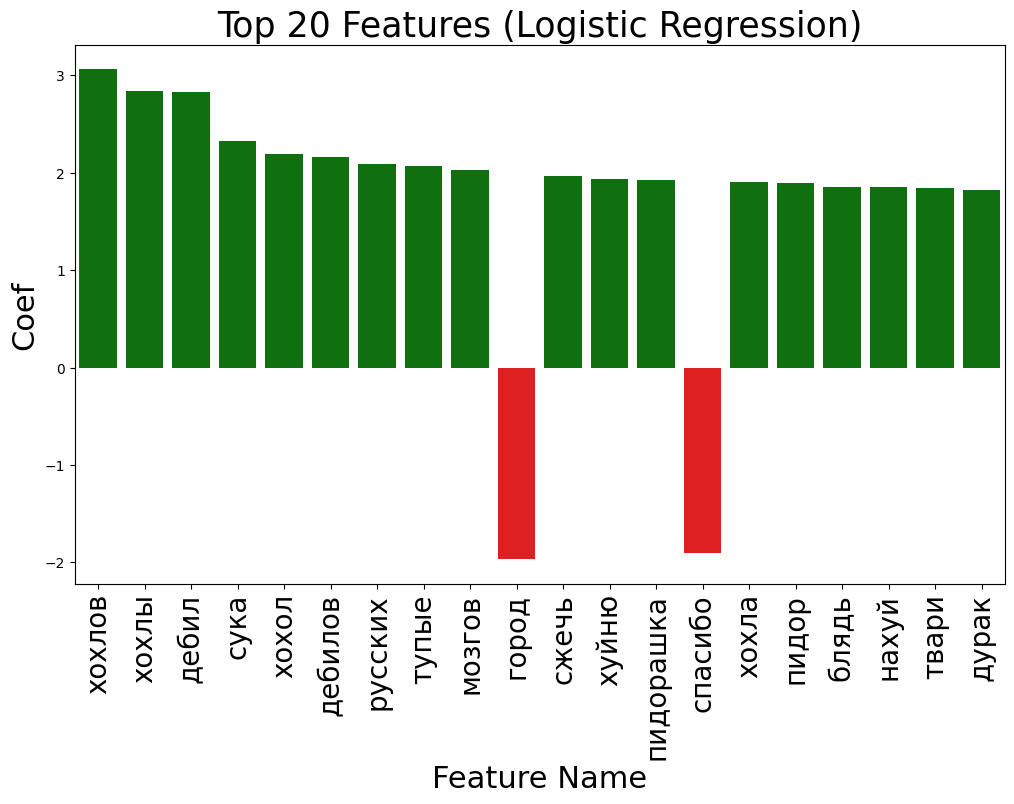

In [303]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features (Logistic Regression)", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

## 2. random forest (модель из предыдущего задания)

In [304]:
feature_names = vectorizer_tfidf.get_feature_names()
coefs = rf.feature_importances_.flatten()

zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [305]:
df

,feature,value,abs_value,colors
754,хохлы,0.047018,0.047018,green
704,тебе,0.045437,0.045437,green
753,хохлов,0.044268,0.044268,green
374,нахуй,0.040151,0.040151,green
450,очень,0.031505,0.031505,green
...,...,...,...,...
64,вашингтон,0.000007,0.000007,green
737,услуги,0.000004,0.000004,green
788,штате,0.000003,0.000003,green
339,млн,0.000002,0.000002,green


Text(0.5, 0, 'Feature Name')

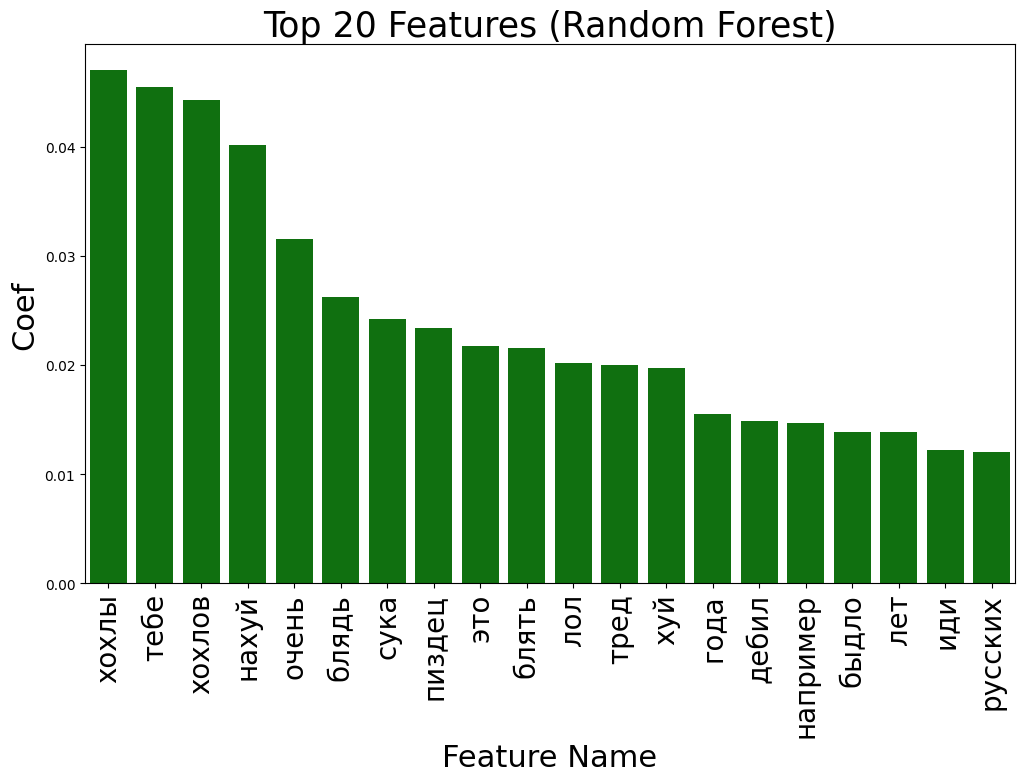

In [306]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features (Random Forest)", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

## 3. decision tree

In [307]:
clf_dt = DecisionTreeClassifier(max_depth=500, criterion='gini', class_weight='balanced')
clf_dt.fit(X_c, y)
preds = clf_dt.predict(X_c_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.86      0.67      0.75       993
         1.0       0.51      0.75      0.61       449

    accuracy                           0.70      1442
   macro avg       0.68      0.71      0.68      1442
weighted avg       0.75      0.70      0.71      1442



In [308]:
feature_names = vectorizer_c.get_feature_names()
coefs = clf_dt.feature_importances_.flatten()

zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

/Users/ignatenkodarja/Library/Python/3.7/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [309]:
df

,feature,value,abs_value,colors
6872,тебе,0.014665,0.014665,green
4225,очень,0.014421,0.014421,green
7489,хохлы,0.013320,0.013320,green
7487,хохлов,0.012258,0.012258,green
3456,нахуй,0.011417,0.011417,green
...,...,...,...,...
2995,маня,0.000000,0.000000,red
2993,маму,0.000000,0.000000,red
2992,мамой,0.000000,0.000000,red
2990,маме,0.000000,0.000000,red


Text(0.5, 0, 'Feature Name')

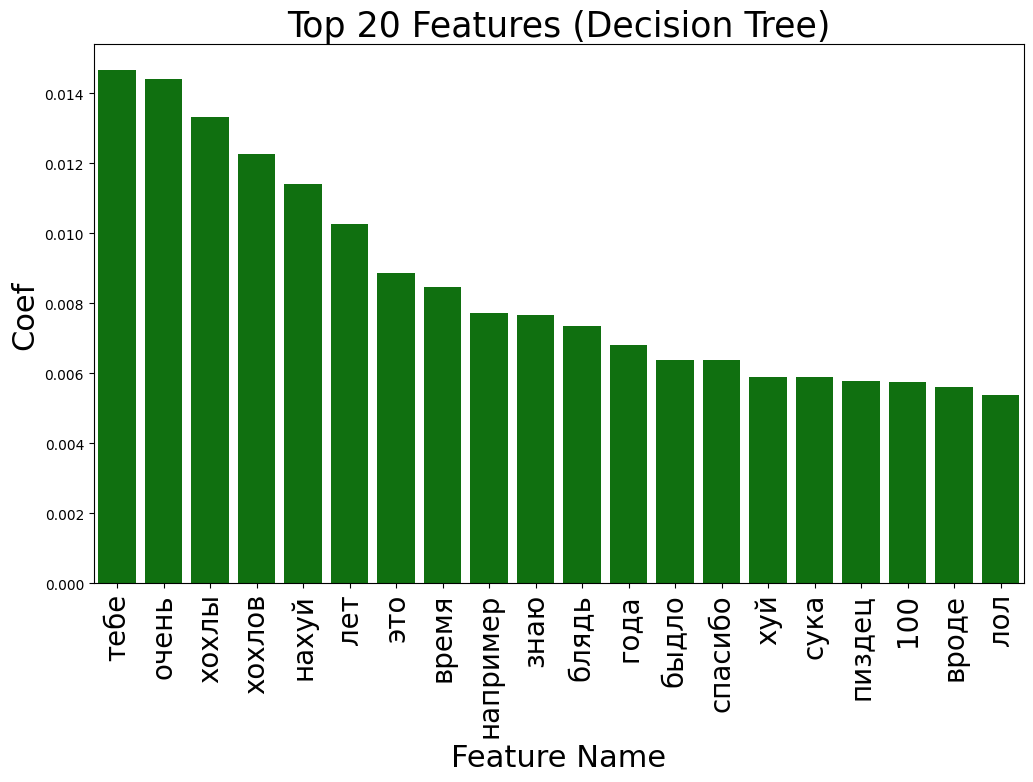

In [310]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features (Decision Tree)", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

## 4. Naive Bayes

In [312]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_c.toarray(), y)
preds = clf_gnb.predict(X_c_test.toarray())

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.89      0.56      0.69       993
         1.0       0.47      0.85      0.60       449

    accuracy                           0.65      1442
   macro avg       0.68      0.71      0.65      1442
weighted avg       0.76      0.65      0.66      1442



In [314]:
#через permutation_importance из sklearn.model_selection
imps = permutation_importance(clf_gnb, X_c_test.toarray(), y_test)
print(imps.importances_mean)

[0. 0. 0. ... 0. 0. 0.]


In [324]:
feature_names = vectorizer_c.get_feature_names()
coefs = imps['importances'].flatten()

zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

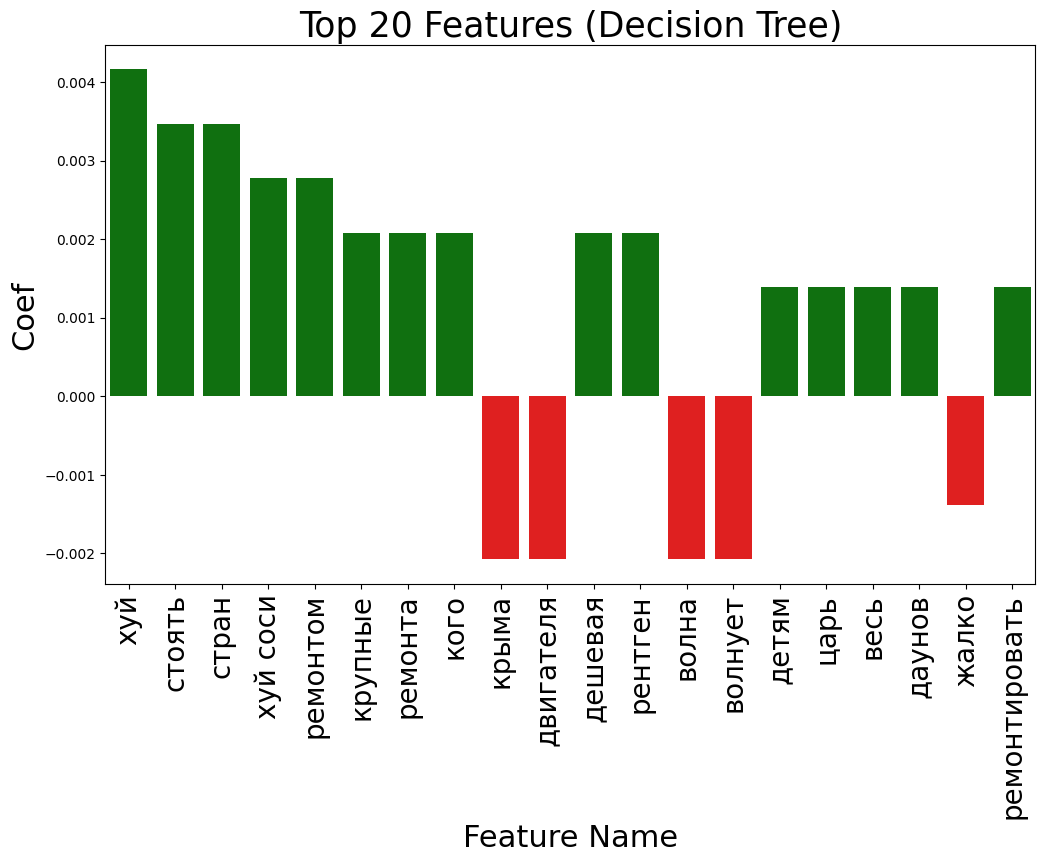

In [325]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features (Decision Tree)", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)